In [ ]:
# Install required libraries for anomaly detection
%pip install numpy scipy matplotlib scikit-learn

# Import libraries for data handling, visualization, and anomaly detection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Note: For real cybersecurity data, you would import and preprocess your own dataset here.


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3.12 -m pip install --upgrade pip
error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.

In [12]:
# Generate synthetic data to simulate cybersecurity events (e.g., network traffic, login attempts)
# In practice, replace this with your real cybersecurity dataset
np.random.seed(42)

# Number of samples and features (e.g., bytes sent, login duration)
n_samples = 300
n_features = 2  # For visualization; use more features for real data
outlier_fraction = 0.1  # Proportion of anomalies expected

# Generate normal data (inliers)
X_inliers = 0.3 * np.random.randn(int((1 - outlier_fraction) * n_samples), n_features)
# Generate anomalous data (outliers)
X_outliers = np.random.uniform(low=-6, high=6, size=(int(outlier_fraction * n_samples), n_features))

# Combine inliers and outliers
dataset = np.vstack([X_inliers, X_outliers])
labels = np.hstack([np.ones(X_inliers.shape[0]), -1 * np.ones(X_outliers.shape[0])])

# Shuffle the dataset
indices = np.arange(dataset.shape[0])
np.random.shuffle(indices)
X_train = dataset[indices]
y_train = labels[indices]


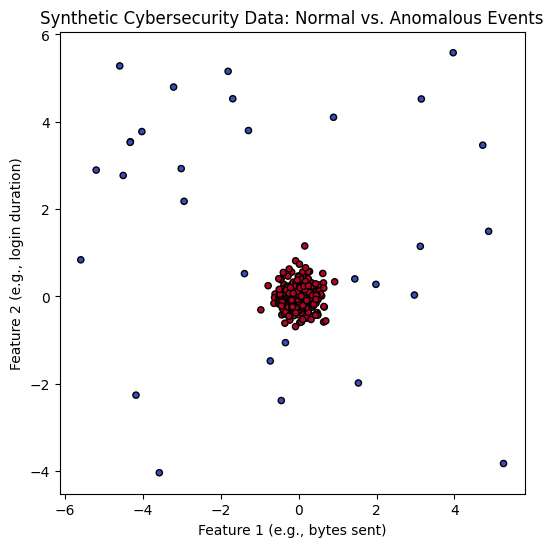

In [13]:
# Visualize the synthetic cybersecurity dataset
# For real data, adjust feature selection and axis labels accordingly

# Create a meshgrid for decision boundary visualization (2D only)
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# Scatter plot of the data
plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=20)
plt.xlabel('Feature 1 (e.g., bytes sent)')
plt.ylabel('Feature 2 (e.g., login duration)')
plt.title('Synthetic Cybersecurity Data: Normal vs. Anomalous Events')
plt.show()

In [14]:
# Anomaly detection is now performed using Isolation Forest in the next cell.


/var/folders/c0/vgnln2293fgcxc8vwjb8b8_40000gp/T/ipykernel_14053/1868186455.py:58: UserWarning: Legend does not support handles for QuadContourSet instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  subplot.legend([


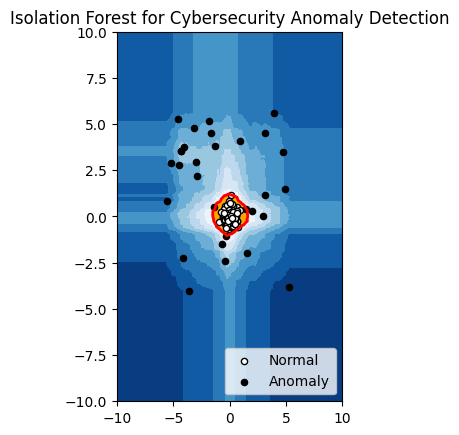

Number of detected anomalies: 30


In [15]:
# Advanced Anomaly Detection for Cybersecurity using Isolation Forest
# This approach is suitable for detecting unusual patterns in network traffic, user logins, or system events.

from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train contains features such as network traffic stats, login times, etc.
# For demonstration, we use synthetic 2D data (replace with real cybersecurity data for practical use)

# Initialize Isolation Forest model
iso_forest = IsolationForest(
    n_estimators=100, # Number of trees
    contamination=outlier_fraction, # Expected proportion of anomalies
    random_state=42
)

# Fit the model to the training data
iso_forest.fit(X_train)

# Predict anomaly scores (the lower, the more abnormal)
scores_pred = iso_forest.decision_function(X_train)

# Predict labels: -1 for anomaly, 1 for normal
y_pred = iso_forest.predict(X_train)

# Calculate threshold for visualization (optional, for 2D data)
threshold = np.percentile(scores_pred, 100 * outlier_fraction)

# Create a mesh grid for visualization (for 2D data only)
Z = iso_forest.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the results
subplot = plt.subplot(1, 2, 1)

# Fill blue colormap for normal region
subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 10), cmap=plt.cm.Blues_r)

# Draw red contour line at the anomaly threshold
anomaly_boundary = subplot.contour(xx, yy, Z, levels=[threshold], linewidths=2, colors='red')

# Fill orange for the anomaly region
subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='orange')

# Scatter plot for normal points (white) and anomalies (black)
normal_points = subplot.scatter(X_train[y_pred == 1, 0], X_train[y_pred == 1, 1], c='white', s=20, edgecolor='k', label='Normal')
anomaly_points = subplot.scatter(X_train[y_pred == -1, 0], X_train[y_pred == -1, 1], c='black', s=20, edgecolor='k', label='Anomaly')

subplot.axis('tight')

# Fix legend for QuadContourSet compatibility
if hasattr(anomaly_boundary, "collections") and anomaly_boundary.collections:
    anomaly_boundary_legend = anomaly_boundary.collections[0]
else:
    anomaly_boundary_legend = anomaly_boundary

subplot.legend([
    anomaly_boundary_legend, normal_points, anomaly_points
],
    ['Anomaly Boundary', 'Normal', 'Anomaly'],
    prop={'size': 10}, loc='lower right')

subplot.set_title('Isolation Forest for Cybersecurity Anomaly Detection')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()

# Print number of detected anomalies
print(f"Number of detected anomalies: {(y_pred == -1).sum()}")
